<a href="https://colab.research.google.com/github/OlehVorobiov/solutions_repo/blob/main/docs/Interactives/CosmicVelocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,First Cosmic Velocity (km/s),Second Cosmic Velocity (km/s),Third Cosmic Velocity (km/s)
Earth,7.909681,11.185978,16.661209
Mars,3.554422,5.026712,11.247836
Jupiter,42.567506,60.199545,60.441022


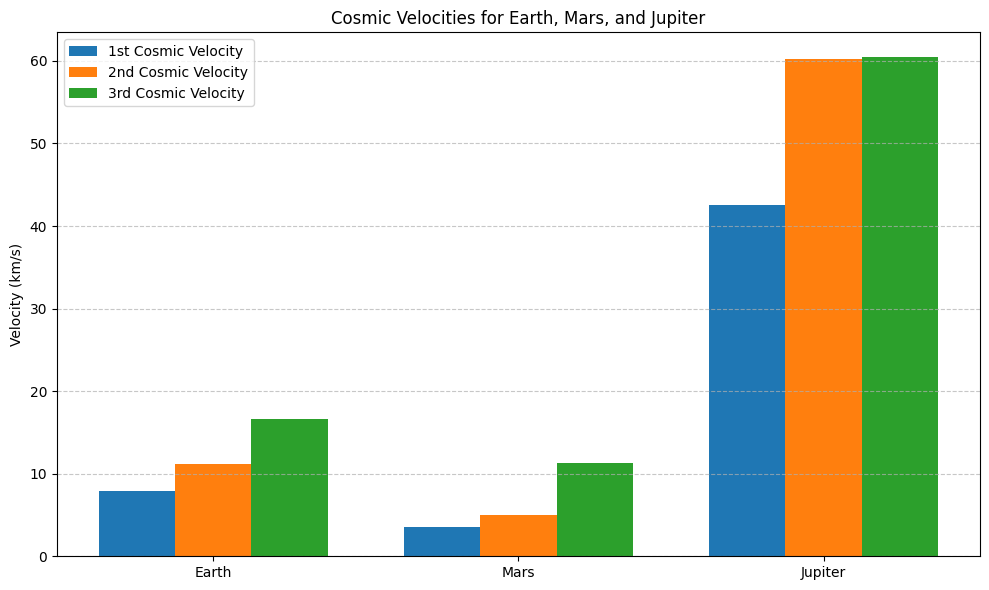

In [1]:
# 🚀 Cosmic Velocities Simulation

import numpy as np
import matplotlib.pyplot as plt

# Gravitational constant
G = 6.67430e-11  # m^3 kg^-1 s^-2

# Celestial bodies data: mass (kg), radius (m), orbital radius around the Sun (for v3)
bodies = {
    "Earth": {
        "mass": 5.972e24,
        "radius": 6.371e6,
        "orbital_radius": 1.496e11,
        "orbital_speed": 29.78e3
    },
    "Mars": {
        "mass": 6.417e23,
        "radius": 3.390e6,
        "orbital_radius": 2.279e11,
        "orbital_speed": 24.07e3
    },
    "Jupiter": {
        "mass": 1.898e27,
        "radius": 6.9911e7,
        "orbital_radius": 7.785e11,
        "orbital_speed": 13.07e3
    }
}

# Sun's mass (for third cosmic velocity)
M_sun = 1.989e30

# Compute velocities
def compute_cosmic_velocities(body):
    M = body["mass"]
    r = body["radius"]
    R_sun = body["orbital_radius"]
    v_orbit = body["orbital_speed"]

    # First Cosmic Velocity (circular orbit at surface)
    v1 = np.sqrt(G * M / r)

    # Second Cosmic Velocity (escape from planet)
    v2 = np.sqrt(2 * G * M / r)

    # Third Cosmic Velocity (escape from Sun's gravity at that orbital radius)
    v3_solar = np.sqrt(2 * G * M_sun / R_sun)
    delta_v = max(v3_solar - v_orbit, 0)

    # Total escape speed from planet's surface into interstellar space
    v3 = np.sqrt(v2**2 + delta_v**2)

    return v1, v2, v3

# Store results
results = {}
for planet, data in bodies.items():
    results[planet] = compute_cosmic_velocities(data)

# Display results as table
import pandas as pd
df = pd.DataFrame(results, index=["First Cosmic Velocity (km/s)",
                                  "Second Cosmic Velocity (km/s)",
                                  "Third Cosmic Velocity (km/s)"])
df = df.transpose() / 1000  # convert to km/s
display(df)

# Plotting
labels = list(results.keys())
v1_vals = [results[planet][0]/1000 for planet in labels]
v2_vals = [results[planet][1]/1000 for planet in labels]
v3_vals = [results[planet][2]/1000 for planet in labels]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, v1_vals, width, label='1st Cosmic Velocity')
bar2 = ax.bar(x, v2_vals, width, label='2nd Cosmic Velocity')
bar3 = ax.bar(x + width, v3_vals, width, label='3rd Cosmic Velocity')

ax.set_ylabel('Velocity (km/s)')
ax.set_title('Cosmic Velocities for Earth, Mars, and Jupiter')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
